## Построение модели на большем количестве каналов

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_rows', 200)

In [33]:
import sys
sys.path.append('../repo/')
from lib.features import get_connectivity_feats

In [67]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [91]:
cv = KFold(n_splits=10, shuffle=True, random_state=90)

In [94]:
cv = LeaveOneOut()

In [101]:
features_df = pd.read_csv('../own_data/1905_features/coh_alpha_ep3.csv')

In [105]:
features_df = pd.read_csv('../own_data/190610_many_channels_coherence_alpha.csv')

In [106]:
features_df = features_df.fillna(0)

features_cols = [col for col in features_df.columns
                 if col not in ['dataset', 'path', 'fn', 'is_patient']]

X = features_df[features_cols].values
y = features_df['is_patient'].values

In [119]:
model.decision_function(X[test_idx, :])

array([-0.40447507])

In [125]:
y_pred = np.zeros(shape=y.shape)
for train_idx, test_idx in cv.split(X, y):
    model = LinearSVC(C=0.1)
    model.fit(X[train_idx, :], y[train_idx])
    y_pred[test_idx] = model.decision_function(X[test_idx, :])

/Users/ledovsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ledovsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ledovsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ledovsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ledovsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase th

KeyboardInterrupt: 

In [ ]:
roc_auc_score(y, y_pred)

In [63]:
features_df.shape

(89, 2687)

In [64]:
features_df.head()

,con_alpha_0_56,con_alpha_101_0,con_alpha_101_56,con_alpha_102_0,con_alpha_102_101,con_alpha_102_107,con_alpha_102_113,con_alpha_102_18,con_alpha_102_36,con_alpha_102_41,...,con_alpha_97_99,con_alpha_99_0,con_alpha_99_101,con_alpha_99_18,con_alpha_99_45,con_alpha_99_54,con_alpha_99_56,dataset,fn,is_patient
0,0.638673,0.843234,0.595560,0.819651,0.990567,0.923167,0.889669,0.567018,0.442532,0.478081,...,0.937708,0.883060,0.942941,0.630787,0.625734,0.686498,0.709157,3min,Sulikova rest 23-06,0
1,0.522274,0.549736,0.431436,0.494898,0.970768,0.617784,0.536672,0.546978,0.439736,0.477995,...,0.674105,0.679416,0.707074,0.470055,0.460062,0.447377,0.599914,3min,Garah rest 17-07,0
2,0.592164,0.481405,0.375613,0.475289,0.935347,0.853348,0.542527,0.366905,0.336739,0.367188,...,0.797235,0.611282,0.815726,0.362195,0.483467,0.492446,0.578327,3min,Samedova rest 27-05,0
3,0.584614,0.544888,0.558275,0.548191,0.912223,0.835465,0.635865,0.384286,0.384912,0.415741,...,0.846065,0.615516,0.876429,0.363546,0.621136,0.397474,0.738839,3min,Usman rest 18-07,0
4,0.477126,0.759762,0.397795,0.793904,0.972040,0.933335,0.857600,0.565245,0.407690,0.408522,...,0.737011,0.585452,0.841741,0.486298,0.396682,0.730318,0.400885,3min,Kravchenko rest 12-04,0


In [2]:
path_df = pd.read_csv('../own_data/1905_path_file.csv')

In [31]:
path_df.head()

,path,fn,is_patient,dataset
0,../../raw_data/norma 3min/Sulikova rest 23-06.raw,Sulikova rest 23-06,0,3min
1,../../raw_data/norma 3min/Garah rest 17-07.raw,Garah rest 17-07,0,3min
2,../../raw_data/norma 3min/Samedova rest 27-05.raw,Samedova rest 27-05,0,3min
3,../../raw_data/norma 3min/Usman rest 18-07.raw,Usman rest 18-07,0,3min
4,../../raw_data/norma 3min/Kravchenko rest 12-0...,Kravchenko rest 12-04,0,3min


In [6]:
df = pd.read_csv('../own_data/epoch_3/Kozhuchova rest 18-06.csv')

In [11]:
df

,time,E1,E2,E3,E4,E5,E6,E7,E8,FP2,...,E120,E121,F8,E123,F4,E125,E126,E127,E128,Cz
0,120000,-8516.807617,-26436.960938,-13441.068359,-861.556091,-4104.783203,-1417.164795,-10712.378906,-4540.165527,-8031.075684,...,-19705.216797,-18517.234375,-6167.478516,-8570.836914,-3940.118408,-9480.562500,-3076.935303,-9020.512695,-12363.125000,0.0
1,120008,-8549.180664,-26442.912109,-13463.136719,-873.686279,-4101.510254,-1408.597900,-10718.778320,-4562.494141,-8045.547852,...,-19747.033203,-18559.978516,-6188.328125,-8585.713867,-3945.431152,-9509.783203,-3103.341797,-9047.370117,-12383.624023,0.0
2,120016,-8528.714844,-26431.824219,-13435.502930,-854.113098,-4094.362793,-1409.705688,-10710.482422,-4538.579102,-8026.639648,...,-19713.197266,-18528.541016,-6161.040039,-8563.234375,-3929.622070,-9486.369141,-3077.103760,-9007.302734,-12350.407227,0.0
3,120024,-8498.937500,-26413.654297,-13421.244141,-840.810364,-4082.480957,-1393.466187,-10702.416992,-4523.790039,-8011.972168,...,-19692.126953,-18506.455078,-6149.293457,-8550.430664,-3918.882568,-9456.043945,-3055.343018,-8999.410156,-12351.063477,0.0
4,120032,-8522.234375,-26414.214844,-13436.958984,-849.771179,-4080.242676,-1396.163940,-10710.362305,-4529.791504,-8016.117676,...,-19717.599609,-18534.222656,-6157.363281,-8561.143555,-3922.001465,-9475.994141,-3062.795166,-9013.316406,-12349.900391,0.0
5,120040,-8501.508789,-26417.841797,-13422.371094,-843.315491,-4087.708008,-1402.989990,-10698.138672,-4526.217285,-8014.713379,...,-19689.320312,-18506.216797,-6147.283691,-8552.196289,-3922.719482,-9463.912109,-3051.829834,-8995.649414,-12343.773437,0.0
6,120048,-8527.195312,-26424.818359,-13445.429688,-858.258972,-4086.892822,-1400.636475,-10708.298828,-4544.340820,-8029.301758,...,-19724.818359,-18540.330078,-6173.868164,-8572.228516,-3932.993408,-9485.616211,-3075.503174,-9021.596680,-12361.134766,0.0
7,120056,-8522.955078,-26435.359375,-13442.155273,-861.204956,-4100.110352,-1417.717163,-10713.505859,-4543.609863,-8028.014160,...,-19717.351562,-18533.166016,-6169.971191,-8571.296875,-3936.353760,-9488.128906,-3076.500977,-9014.743164,-12358.698242,0.0
8,120064,-8515.171875,-26429.099609,-13440.493164,-861.893738,-4101.520020,-1414.045898,-10713.007812,-4553.010254,-8037.632324,...,-19702.814453,-18519.572266,-6159.113281,-8564.336914,-3934.142090,-9477.373047,-3073.094971,-9031.603516,-12381.977539,0.0
9,120072,-8543.679688,-26442.105469,-13467.182617,-878.621094,-4104.505371,-1417.594360,-10723.362305,-4556.850586,-8046.854492,...,-19745.859375,-18558.273438,-6186.043945,-8587.185547,-3948.325928,-9504.267578,-3092.281494,-9038.144531,-12377.455078,0.0


In [56]:
electrodes = []
with open('../../tmp/egi_to_10-10.txt', 'r') as f:
    for line in f.readlines():
        fields = line.split(' ')
        electrodes += [fields[1]]
        if len(fields) == 6:
            electrodes += [fields[4]] 
        if len(fields) == 5:
            electrodes += [fields[3]]
electrodes = [int(el) for el in electrodes]

In [36]:
from mne.connectivity import spectral_connectivity, phase_slope_index
import itertools

In [60]:
df.shape

(7500, 130)

In [58]:
%%time
res = spectral_connectivity(
        df.iloc[:, electrodes].values.T.reshape(1, len(electrodes), -1),
        method='coh', sfreq=125, verbose=False)

/Users/ledovsky/anaconda3/lib/python3.7/site-packages/mne/connectivity/spectral.py:91: RuntimeWarning: invalid value encountered in true_divide
  self.con_scores[con_idx] = np.abs(csd_mean) / np.sqrt(psd_xx * psd_yy)


CPU times: user 3.58 s, sys: 2.29 s, total: 5.88 s
Wall time: 5.76 s


In [59]:
df.iloc[:, electrodes].values.T.reshape(1, len(electrodes), -1)

array([[[  347.10778809,   337.98312378,   351.46343994, ...,
           704.18603516,   693.21295166,   689.21777344],
        [ -861.55609131,  -873.6862793 ,  -854.11309814, ...,
          -698.81573486,  -712.59838867,  -726.04223633],
        [ 5121.1328125 ,  5113.88623047,  5122.97753906, ...,
          5295.83544922,  5289.74755859,  5279.3515625 ],
        ...,
        [-2463.8815918 , -2464.43334961, -2458.95898437, ...,
         -2320.77392578, -2326.02075195, -2331.19824219],
        [-8516.80761719, -8549.18066406, -8528.71484375, ...,
         -8197.34472656, -8209.52832031, -8241.08398438],
        [-4312.59912109, -4329.24316406, -4296.67919922, ...,
         -4288.05273438, -4310.58642578, -4312.70410156]]])

In [55]:
res[0].shape

(76, 76, 3746)

In [37]:
def get_connectivity_feats(df, sfreq=500., rhythm='alpha', method='coh'):
    res = spectral_connectivity(
        df.iloc[channels].values.T.reshape(1, len(electrodes), -1),
        method=method, sfreq=sfreq, verbose=False)

    coh_data = res[0]
    freqs = res[1]

    if rhythm == 'alpha':
        fmin = 8
        fmax = 13
    elif rhythm == 'beta':
        fmin = 13
        fmax = 30

    idx_start = np.where(freqs > fmin)[0][0]
    idx_end = np.where(freqs < fmax)[0][-1]

    d = {}
    for idx_1, idx_2 in itertools.combinations(range(len(channels)), 2):
        el_1 = idx_electrodes_dict[idx_1]
        el_2 = idx_electrodes_dict[idx_2]
        d['con_alpha_' + el_1 + '_' + el_2] = coh_data[idx_2, idx_1][idx_start:idx_end + 1].mean()

    return d

In [38]:
d = get_connectivity_feats(df, sfreq=125.)

KeyError: "None of [Index(['36', '4', '104', '27', '129', '123', '24', '32', '124', '13', '33',\n       '112', '122', '29', '22', '111', '9', '28', '14', '117', '21', '6',\n       '15', '121', '11', '34', '70', '116', '83', '38', '52', '75', '92',\n       '60', '58', '64', '96', '95', '45', '85', '108', '51', '23', '97', '3',\n       '64', '26', '67', '2', '77', '16', '65', '30', '90', '105', '72', '41',\n       '62', '103', '37', '114', '87', '45', '42', '93', '108', '47', '44',\n       '98', '100', '55', '46', '19', '102', '1', '57'],\n      dtype='object')] are in the [columns]"

In [1]:



from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [6]:
features_df = pd.read_csv('own_data/181031_coh_alpha_feats.csv')

In [3]:
features_df = pd.read_csv('own_data/181014_imcoh_alpha_feats.csv')

In [4]:
features_df = pd.read_csv('own_data/181014_wpli_alpha_feats.csv')

In [7]:
features_df.shape

(84, 94)

In [8]:
features_df = features_df.fillna(0)

In [9]:
features_cols = [col for col in features_df.columns if col not in ['dataset', 'path', 'fn', 'is_patient']]

X = features_df[features_cols].values
y = features_df['is_patient'].values

In [10]:
loo = LeaveOneOut()

pr = []
rec = []

y_pred = np.empty(len(y))
y_score = np.empty(len(y))
for train_idx, test_idx in loo.split(X, y):
    model = LogisticRegression()
    model.fit(X[train_idx, :], y[train_idx])
    y_pred[test_idx] = model.predict(X[test_idx, :])[0]
    y_score[test_idx] = model.predict_proba(X[test_idx, :])[0, 1]

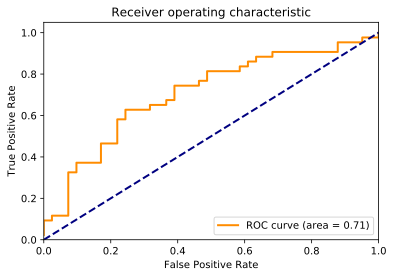

In [11]:
fpr, tpr, _ = roc_curve(y, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_score))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)

In [13]:
loo = LeaveOneOut()

pr = []
rec = []

y_pred = np.empty(len(y))
y_score = np.empty(len(y))
for train_idx, test_idx in loo.split(X, y):
    model = LogisticRegression()
    model.fit(X_poly[train_idx, :], y[train_idx])
    y_pred[test_idx] = model.predict(X_poly[test_idx, :])[0]
    y_score[test_idx] = model.predict_proba(X_poly[test_idx, :])[0, 1]

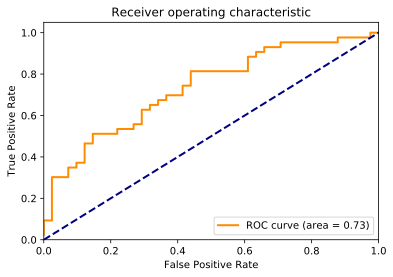

In [15]:
fpr, tpr, _ = roc_curve(y, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_score))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
features_df.iloc[np.argsort(np.abs(y_pred - y))[::-1][:5]]

,con_alpha_C3_P3,con_alpha_C3_T5,con_alpha_C4_C3,con_alpha_C4_F3,con_alpha_C4_F4,con_alpha_C4_F7,con_alpha_C4_O2,con_alpha_C4_P3,con_alpha_C4_T3,con_alpha_C4_T5,...,con_alpha_T6_O1,con_alpha_T6_O2,con_alpha_T6_P3,con_alpha_T6_P4,con_alpha_T6_T3,con_alpha_T6_T4,con_alpha_T6_T5,dataset,fn,is_patient
31,0.552048,0.511511,0.403721,0.425651,0.715369,0.449497,0.447144,0.393820,0.409861,0.384983,...,0.565238,0.821675,0.514015,0.913100,0.460405,0.758732,0.570498,3min,Samedova rest 27-05.raw,0
42,0.675302,0.595717,0.420687,0.391478,0.484836,0.393462,0.525937,0.423139,0.403355,0.415284,...,0.827324,0.955093,0.654654,0.951526,0.607716,0.907235,0.723286,3min,Markov rest 31-01.raw,0
24,0.766994,0.474672,0.352492,0.390512,0.622532,0.410323,0.478591,0.340277,0.382028,0.361038,...,0.668069,0.857724,0.460652,0.928883,0.521779,0.861350,0.585703,8min,Chernyaev rest 20-05.raw,1
18,0.760076,0.691811,0.461714,0.386797,0.672705,0.339843,0.600122,0.357010,0.000000,0.392590,...,0.450575,0.454803,0.383069,0.527218,0.000000,0.629059,0.430708,8min,Dudko rest 20-02.raw,1
46,0.486985,0.445448,0.512943,0.419478,0.351231,0.441612,0.433115,0.363223,0.384085,0.369532,...,0.736593,0.846462,0.452914,0.828678,0.474387,0.716692,0.571747,3min,Kononova rest 21-01.raw,0


In [17]:
to_drop = np.argsort(np.abs(y_score - y))[::-1][:5]

In [18]:
loo = LeaveOneOut()

pr = []
rec = []

y_pred_poly = np.empty(len(y))
y_score_poly = np.empty(len(y))
for train_idx, test_idx in loo.split(X, y):
    train_idx = [idx for idx in train_idx if idx not in to_drop]
    model = LogisticRegression()
    model.fit(X_poly[train_idx, :], y[train_idx])
    y_pred_poly[test_idx] = model.predict(X_poly[test_idx, :])[0]
    y_score_poly[test_idx] = model.predict_proba(X_poly[test_idx, :])[0, 1]

In [20]:
fpr

array([0.        , 0.        , 0.02439024, 0.02439024, 0.04878049,
       0.04878049, 0.07317073, 0.07317073, 0.12195122, 0.12195122,
       0.14634146, 0.14634146, 0.17073171, 0.17073171, 0.19512195,
       0.19512195, 0.2195122 , 0.2195122 , 0.24390244, 0.24390244,
       0.26829268, 0.26829268, 0.31707317, 0.31707317, 0.34146341,
       0.34146341, 0.36585366, 0.36585366, 0.43902439, 0.43902439,
       0.46341463, 0.46341463, 0.53658537, 0.53658537, 0.58536585,
       0.58536585, 0.65853659, 0.65853659, 0.73170732, 0.73170732,
       0.97560976, 0.97560976, 1.        ])

In [21]:
tpr

array([0.02325581, 0.11627907, 0.11627907, 0.23255814, 0.23255814,
       0.39534884, 0.39534884, 0.46511628, 0.46511628, 0.51162791,
       0.51162791, 0.55813953, 0.55813953, 0.58139535, 0.58139535,
       0.60465116, 0.60465116, 0.72093023, 0.72093023, 0.74418605,
       0.74418605, 0.76744186, 0.76744186, 0.79069767, 0.79069767,
       0.81395349, 0.81395349, 0.8372093 , 0.8372093 , 0.86046512,
       0.86046512, 0.88372093, 0.88372093, 0.90697674, 0.90697674,
       0.93023256, 0.93023256, 0.95348837, 0.95348837, 0.97674419,
       0.97674419, 1.        , 1.        ])

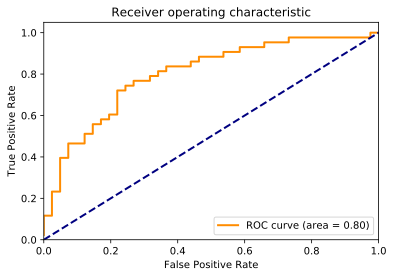

In [19]:
fpr, tpr, _ = roc_curve(y, y_score_poly)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_score_poly))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('plots/181212_coh_auc078.png', dpi=200, tranparent=True, bbox_inches='tight')

In [16]:
features_df['y_score'] = y_score_poly

In [17]:
scores_df = features_df[['fn', 'is_patient', 'dataset', 'y_score']].sort_values('y_score')

In [18]:
scores_df.to_excel('own_data/181108_coherence_scores.xlsx', index=False)

In [19]:
loo = LeaveOneOut()

pr = []
rec = []

y_pred_xgb = np.empty(len(y))
y_score_xgb = np.empty(len(y))
for train_idx, test_idx in loo.split(X, y):
#     train_idx = [idx for idx in train_idx if idx not in to_drop]
    
    model = xgb.XGBClassifier(n_estimators=20, max_depth=6, learning_rate=0.1)

    model.fit(X[train_idx, :], y[train_idx])
    y_pred_xgb[test_idx] = model.predict(X[test_idx, :])[0]
    y_score_xgb[test_idx] = model.predict_proba(X[test_idx, :])[0, 1]

/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

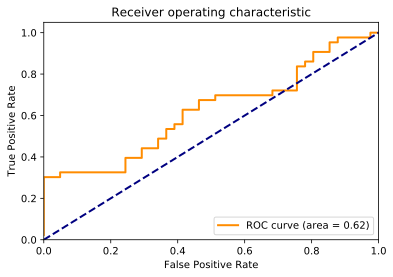

In [20]:
fpr, tpr, _ = roc_curve(y, y_score_xgb)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_score_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
y_score_mix = y_score_xgb * .4 + y_score_poly * .6

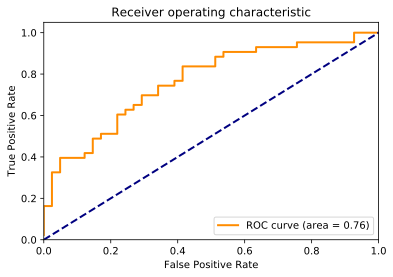

In [22]:
fpr, tpr, _ = roc_curve(y, y_score_mix)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_score_mix))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('plots/181011_kul_feats_roc_auc_08.png', transparent=True, dpi=150)

In [23]:
# scores_df = features_df[['fn', 'is_patient', 'dataset', 'y_score']].sort_values('y_score')
scores = scores_df['y_score'].values
col1 = sns.color_palette()[0]
col2 = sns.color_palette()[1]
colors = [col2 if is_pat else col1 for is_pat in scores_df['is_patient']]
idx = np.arange(len(scores_df))

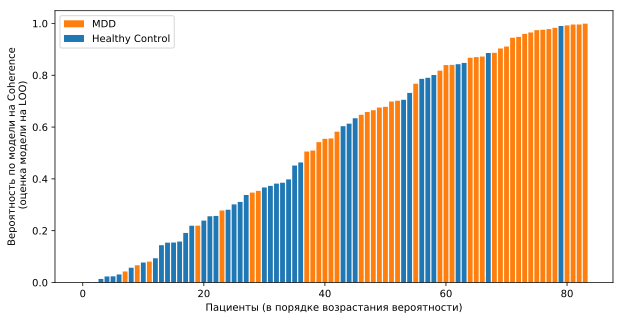

In [24]:
plt.figure(figsize=[10, 5])
plt.xlabel('Пациенты (в порядке возрастания вероятности)')
plt.ylabel('Вероятность по модели на Coherence\n (оценка модели на LOO)')
bars = plt.bar(idx, scores, color=colors)

# !!! select colors by hands
plt.legend([bars[0], bars[1]], ['MDD', 'Healthy Control'])

plt.savefig('own_data/181031_score_bars_coh.png', dpi=300, transparent=True, bbox_inches='tight')

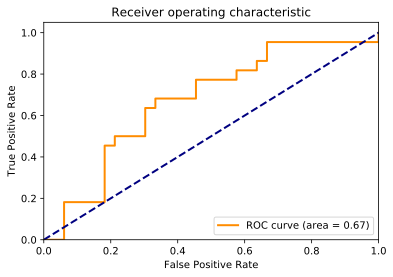

In [46]:
features_df_train = features_df[features_df['dataset'] == '3min']
features_df_test = features_df[features_df['dataset'] == '8min']

X_train = features_df_train[features_cols].values
y_train = features_df_train['is_patient'].values
X_test = features_df_test[features_cols].values
y_test = features_df_test['is_patient'].values

loo = LeaveOneOut()

pr = []
rec = []

y_pred = np.empty(len(y_train))
y_score = np.empty(len(y_train))
for train_idx, test_idx in loo.split(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train[train_idx, :], y_train[train_idx])
    y_pred[test_idx] = model.predict(X_train[test_idx, :])[0]
    y_score[test_idx] = model.predict_proba(X_train[test_idx, :])[0, 1]

fpr, tpr, _ = roc_curve(y_train, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, y_score))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
to_drop = np.argsort(np.abs(y_pred - y_train))[::-1][:5]

In [48]:
train_idx = [idx for idx in np.arange(len(X_train)) if idx not in to_drop]

model_lr = LogisticRegression()
model_lr.fit(X_train[train_idx, :], y_train[train_idx])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_pred_lr = model_lr.predict_proba(X_test)[:, 1]

In [68]:
precision_score(y_test, y_pred_lr > 0.4)

0.7777777777777778

In [67]:
recall_score(y_test, y_pred_lr > 0.4)

0.6666666666666666

In [52]:
features_df['score_new_model'] = 0
features_df.loc[features_df['dataset'] == '8min', 'score_new_model']  = y_pred_lr

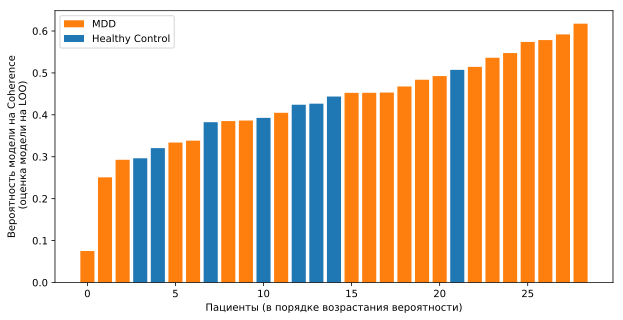

In [57]:
scores_df = features_df.loc[features_df['dataset'] == '8min', ['fn', 'is_patient', 'dataset', 'score_new_model']].sort_values('score_new_model')
scores = scores_df['score_new_model']
col1 = sns.color_palette()[0]
col2 = sns.color_palette()[1]
colors = [col2 if is_pat else col1 for is_pat in scores_df['is_patient']]
idx = np.arange(len(scores_df))

plt.figure(figsize=[10, 5])
plt.xlabel('Пациенты (в порядке возрастания вероятности)')
plt.ylabel('Вероятность модели на Coherence\n (оценка модели на LOO)')
bars = plt.bar(idx, scores, color=colors)

# !!! select colors by hands
plt.legend([bars[0], bars[3]], ['MDD', 'Healthy Control'])

plt.savefig('own_data/181031_score_bars_8min_coh.png', dpi=300, transparent=True, bbox_inches='tight')

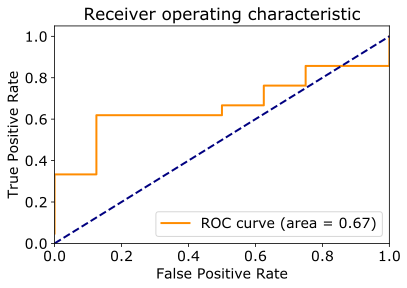

In [59]:
font = {'family' : 'Verdana',
#         'weight' : 'bold',
        'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)

fpr, tpr, _ = roc_curve(y_test, y_pred_lr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

plt.savefig('plots/181031_rocauc_8min_coh.png', dpi=300, transparent=True, bbox_inches='tight')

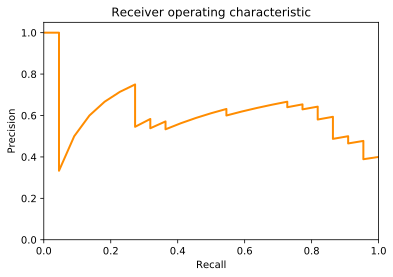

In [29]:
pr, rec, _ = precision_recall_curve(y, y_score_poly)
plt.figure()
lw = 2
plt.plot(rec, pr, color='darkorange',
         lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
for a, b in zip(fpr, tpr):
    print(a, b)

0.0 0.045454545454545456
0.0 0.13636363636363635
0.030303030303030304 0.13636363636363635
0.030303030303030304 0.36363636363636365
0.06060606060606061 0.36363636363636365
0.06060606060606061 0.5
0.09090909090909091 0.5
0.09090909090909091 0.5454545454545454
0.18181818181818182 0.5454545454545454
0.18181818181818182 0.6363636363636364
0.21212121212121213 0.6363636363636364
0.21212121212121213 0.7272727272727273
0.2727272727272727 0.7272727272727273
0.2727272727272727 0.7727272727272727
0.30303030303030304 0.7727272727272727
0.30303030303030304 0.8181818181818182
0.5151515151515151 0.8181818181818182
0.5151515151515151 0.8636363636363636
0.6363636363636364 0.8636363636363636
0.6363636363636364 0.9545454545454546
0.8787878787878788 0.9545454545454546
0.8787878787878788 1.0
1.0 1.0


In [25]:
model = LogisticRegression()
model.fit(X, y)


cols = features_df.columns[:-2]

feature_importance = pd.Series(model.coef_[0], index=cols)

feature_importance = feature_importance.loc[feature_importance.abs().sort_values(ascending=False).index]

feature_importance

cor_T6_C4    0.918222
cor_P4_C4    0.681339
cor_O2_C3   -0.586353
cor_C4_C3   -0.580189
cor_O1_C4    0.574234
cor_O1_C3   -0.539121
cor_C4_F4   -0.525607
cor_T4_C4    0.517498
cor_T4_F8    0.516338
cor_F8_T3    0.515906
cor_T6_F3   -0.505220
cor_P4_F4   -0.496110
cor_C3_T5   -0.489431
cor_F3_F4   -0.480342
cor_C4_O2    0.451886
cor_T6_F4   -0.428647
cor_F3_O2   -0.415594
cor_O2_F4   -0.401556
cor_P4_T5    0.376738
cor_C4_F3   -0.347336
cor_T3_F7    0.346135
cor_T6_C3   -0.342550
cor_T4_F4   -0.339468
cor_T4_O1    0.338134
cor_F8_C4    0.317153
cor_O1_F8    0.304851
cor_T6_O2   -0.293094
cor_P4_F3   -0.285152
cor_T6_O1   -0.257682
cor_O1_F3   -0.244682
               ...   
cor_T4_T3    0.107066
cor_O1_F7    0.100406
cor_T3_T5   -0.089908
cor_P4_F7   -0.087086
cor_F8_F3   -0.086515
cor_C4_T3    0.086477
cor_O2_P3   -0.086043
cor_O2_T5    0.085352
cor_T6_T3    0.081936
cor_T6_P3   -0.081027
cor_T4_F3   -0.080048
cor_F8_P3    0.071473
cor_F8_F7    0.068476
cor_O1_P3    0.061229
cor_P4_P3 

In [71]:
features_df_copy = features_df.copy()

features_df_copy.set_index('fn', inplace=True)

features_df_copy = features_df_copy.iloc[:, :-2].stack().reset_index().rename(columns={'level_1': 'feature', 0: 'value'})
features_df_copy = features_df_copy.merge(features_df[['fn', 'is_patient']], on='fn')

feats = features_df_copy['feature'].unique()

/Users/ledovsky/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


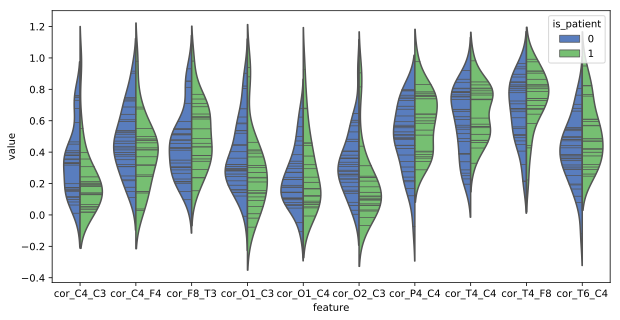

In [292]:
plt.figure(figsize=[10, 5])
sns.violinplot(x="feature", y="value", hue="is_patient",
               data=features_df_copy[features_df_copy['feature'].isin(feature_importance.index[:10])], 
               palette="muted", split=True, inner='stick')
plt.savefig('plots/181011_violin_top10_feats.png', transparent=True, dpi=150)

/Users/ledovsky/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/ledovsky/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


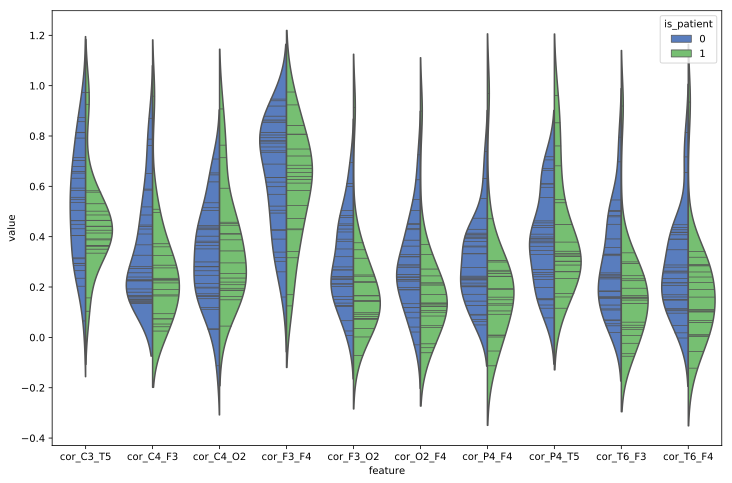

In [82]:
plt.figure(figsize=[12, 8])
sns.violinplot(x="feature", y="value", hue="is_patient",
               data=features_df_copy[features_df_copy['feature'].isin(feature_importance.index[10:20])], 
               palette="muted", split=True, inner='stick')


In [246]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_score_mix > 0.5)

0.6363636363636364

In [210]:
from sklearn.model_selection import KFold, StratifiedKFold

In [280]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_aucs = []

pr = []
rec = []

y_pred = np.empty(len(y))
y_score = np.empty(len(y))
for train_idx, test_idx in cv.split(X, y):
    train_idx = [idx for idx in train_idx if idx not in to_drop]
    model = LogisticRegression()
    model.fit(X[train_idx, :], y[train_idx])
#     y_pred[test_idx] = model.predict(X[test_idx, :])[0]
    y_score = model.predict_proba(X[test_idx, :])[:, 1]
    roc_aucs.append(roc_auc_score(y[test_idx], y_score))
    accs.append(accuracy_score(y[test_idx], y_score > 0.5))

In [281]:
np.array(roc_aucs).mean()

0.7607142857142858

In [282]:
np.array(roc_aucs).std()

0.13769235154310275

In [283]:
np.array(accs).mean()

0.7141521926582902

In [284]:
np.array(accs).std()

0.16409297430865888